In [266]:
import numpy as np
import matplotlib.pyplot as plt


In [267]:
def trapezoidal_mf(x, a, b, c, d):
    """
    Трапециевидная функция принадлежности с проверками на деление на ноль.
    :param x: Точки, для которых вычисляется функция принадлежности.
    :param a: Левая граница начала возрастания функции.
    :param b: Левая верхняя граница (где функция равна 1).
    :param c: Правая верхняя граница (где функция равна 1).
    :param d: Правая граница окончания убывания функции.
    :return: Значение функции принадлежности в точках x.
    """
    # Инициализация массивов
    left_slope = np.zeros_like(x)
    right_slope = np.zeros_like(x)

    # Проверка на деление на ноль и корректное вычисление левой части
    if b != a:
        left_slope = (x - a) / (b - a)
    else:
        left_slope = np.ones_like(1)
    
    # Проверка на деление на ноль и корректное вычисление правой части
    if c != d:
        right_slope = (d - x) / (d - c)
    else:
        right_slope = np.ones_like(1)

    # Применяем ограничения на значения от 0 до 1
    left_slope = np.clip(left_slope, 0, 1)
    right_slope = np.clip(right_slope, 0, 1)
    
    # Возвращаем минимум из левой и правой части, чтобы создать трапециевидную форму
    return np.maximum(0, np.minimum(left_slope, np.minimum(1, right_slope)))


In [268]:
# Импликация (минимум)
def implication(A, B):
    return np.minimum(A, B)

In [269]:
# Функции принадлежности для температуры
def temperature_membership(x):
    cold = trapezoidal_mf(x, 0, 0, 10, 20)
    cool = trapezoidal_mf(x, 15, 20, 25, 30)
    warm = trapezoidal_mf(x, 25, 30, 35, 40)
    hot = trapezoidal_mf(x, 35, 40, 50, 50)
    return cold, cool, warm, hot


In [270]:
# Функции принадлежности для влажности воздуха
def humidity_membership(x):
    dry = trapezoidal_mf(x, 0, 0, 20, 40)
    moderately_wet = trapezoidal_mf(x, 30, 50, 60, 70)
    wet = trapezoidal_mf(x, 60, 80, 90, 100)
    very_wet = trapezoidal_mf(x, 80, 100, 100, 100)
    return dry, moderately_wet, wet, very_wet


In [271]:
x_temperature = np.linspace(0, 50, 500)
x_humidity = np.linspace(0, 100, 500)

# Получаем функции принадлежности для температуры и влажности
cold, cool, warm, hot = temperature_membership(x_temperature)
dry, moderately_wet, wet, very_wet = humidity_membership(x_humidity)


In [272]:
# Словарь для хранения результатов импликации
implication_results = {
    "Если холодно -> сухо": implication(cold, dry),
    "Если холодно -> умеренно влажно": implication(cold, moderately_wet),
    "Если холодно -> влажно": implication(cold, wet),
    "Если холодно -> очень влажно": implication(cold, very_wet),
    
    "Если прохладно -> сухо": implication(cool, dry),
    "Если прохладно -> умеренно влажно": implication(cool, moderately_wet),
    "Если прохладно -> влажно": implication(cool, wet),
    "Если прохладно -> очень влажно": implication(cool, very_wet),
    
    "Если тепло -> сухо": implication(warm, dry),
    "Если тепло -> умеренно влажно": implication(warm, moderately_wet),
    "Если тепло -> влажно": implication(warm, wet),
    "Если тепло -> очень влажно": implication(warm, very_wet),
    
    "Если жарко -> сухо": implication(hot, dry),
    "Если жарко -> умеренно влажно": implication(hot, moderately_wet),
    "Если жарко -> влажно": implication(hot, wet),
    "Если жарко -> очень влажно": implication(hot, very_wet),
}


In [273]:
# Функция для визуализации нечетких множеств

def plot_fuzzy_sets(x, sets, labels, title):
    plt.figure(figsize=(10, 6))
    for s, label in zip(sets, labels):
        plt.plot(x, s, label=label)
    plt.title(title)
    plt.xlabel("Температура (°C)" if 'Температура' in title else "Влажность (%)")
    plt.ylabel("Принадлежность")
    plt.legend()
    plt.grid(True)
    plt.show()


In [274]:
# Функция для визуализации результатов импликации

def plot_fuzzy_sets_results(ax, x, sets, labels, title):
    for s, label in zip(sets, labels):
        ax.plot(x, s, label=label)
    ax.set_title(title)
    ax.set_xlabel("Влажность (%)" if 'Влажность' in title else "Температура (°C)")
    ax.set_ylabel("Принадлежность")
    ax.legend()
    ax.grid(True)


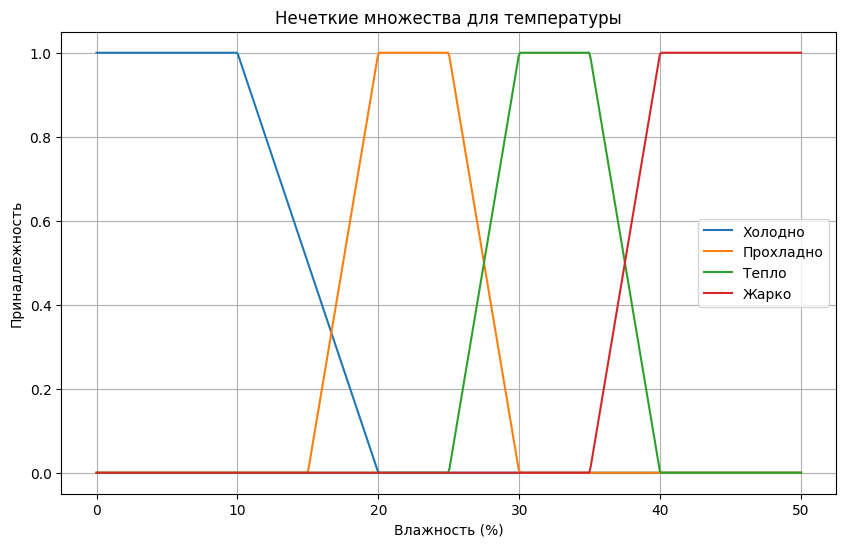

In [275]:
# Визуализация нечетких множеств для температуры
plot_fuzzy_sets(x_temperature, [cold, cool, warm, hot],
                ["Холодно", "Прохладно", "Тепло", "Жарко"], "Нечеткие множества для температуры")


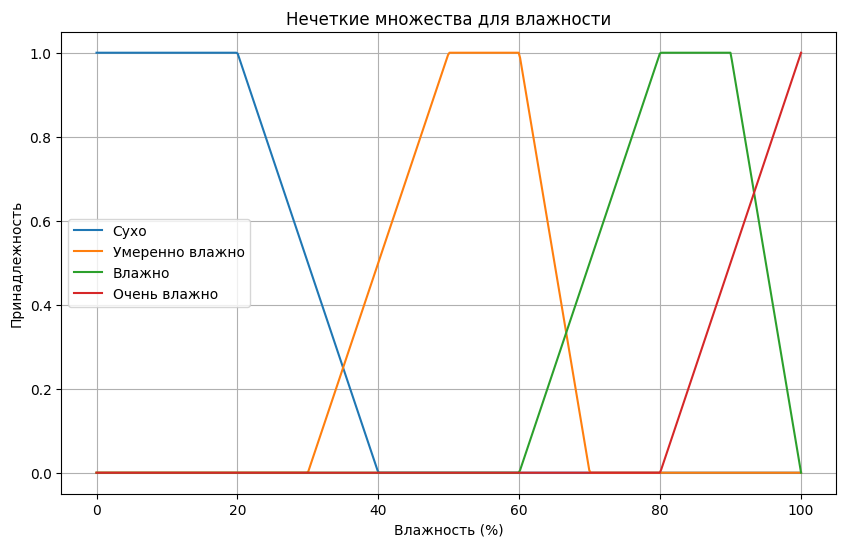

In [276]:
# Визуализация нечетких множеств для влажности воздуха
plot_fuzzy_sets(x_humidity, [dry, moderately_wet, wet, very_wet],
                ["Сухо", "Умеренно влажно", "Влажно", "Очень влажно"], "Нечеткие множества для влажности")


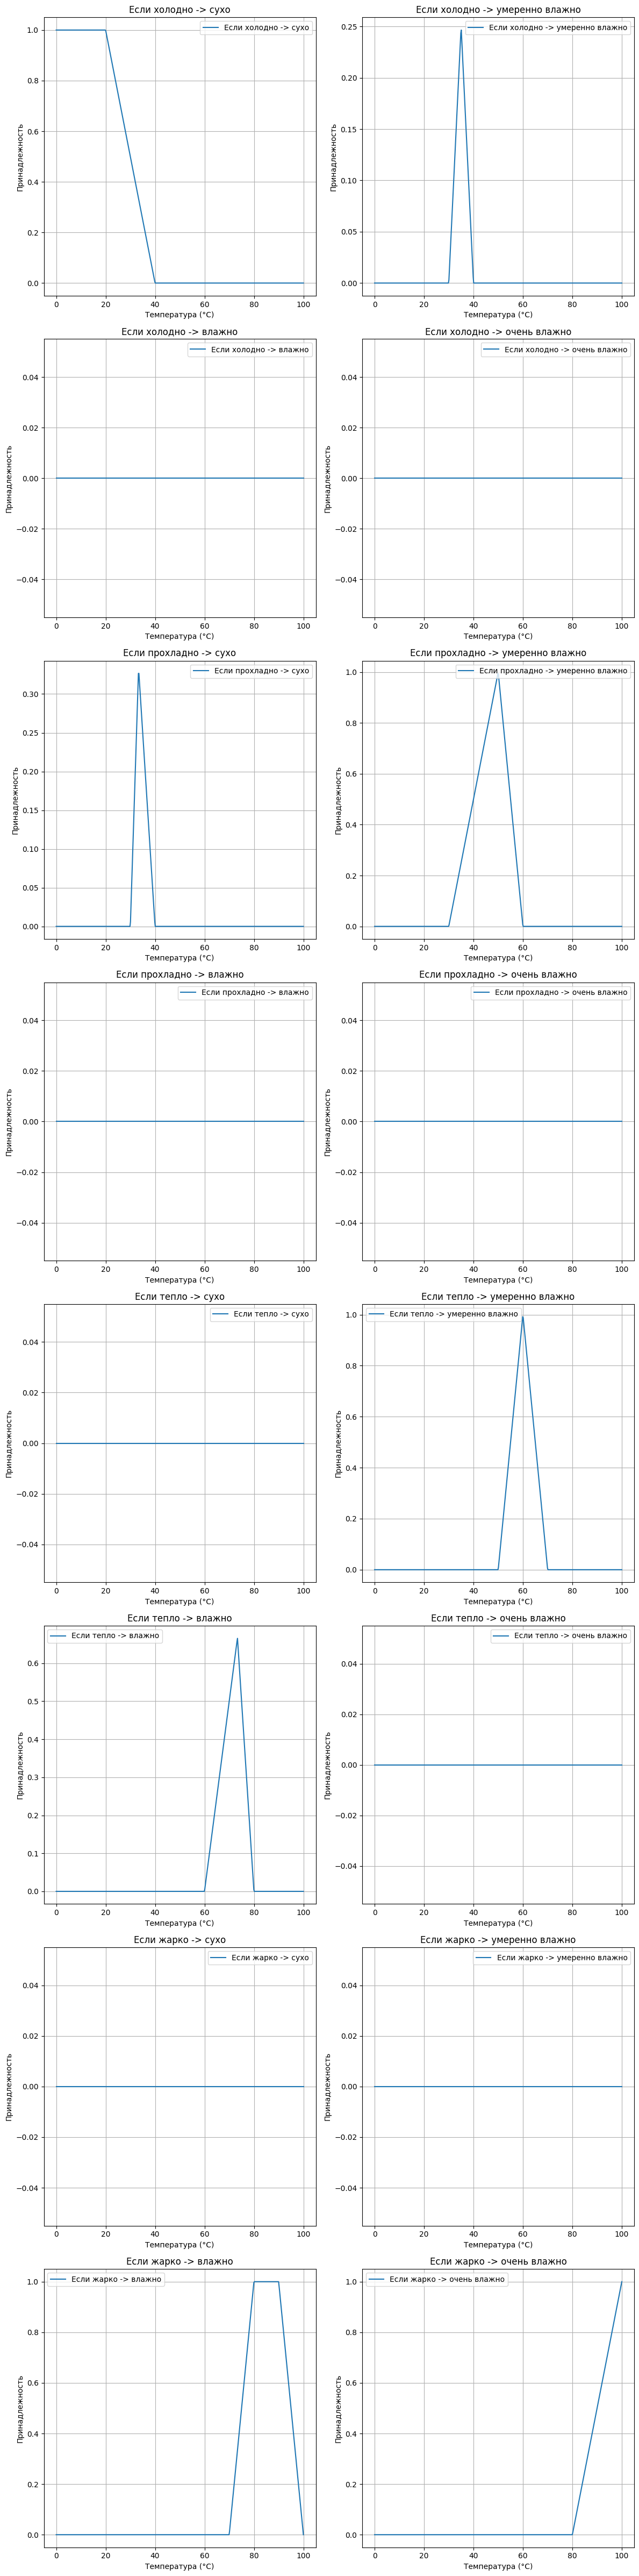

In [277]:
# Графики импликации
fig, axs = plt.subplots(8, 2, figsize=(12, 48))

for ax, (title, result) in zip(axs.flatten(), implication_results.items()):
    plot_fuzzy_sets_results(ax, x_humidity, [result], [title], title)

plt.tight_layout()
plt.show()
